**Logistic Regression and Decision Tree**

Decision Tree Accuracy: 84.9500%
Confusion Matrix:
 [[ 572  152]
 [ 149 1127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       724
           1       0.88      0.88      0.88      1276

    accuracy                           0.85      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.85      0.85      2000



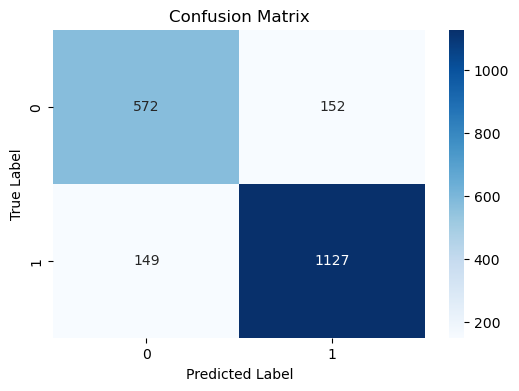

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
df=pd.read_csv("Data_for_UCI_named.csv")
# Drop the unnecessary 'stab' column
df = df.drop(columns=['stab'])

# Encode the target variable ('stabf')
label_encoder = LabelEncoder()
df['stabf'] = label_encoder.fit_transform(df['stabf'])  # stable -> 1, unstable -> 0

# Split into features and target
X = df.drop(columns=['stabf'])
y = df['stabf']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check distribution of classes in training set
y_train.value_counts(normalize=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy*100:.4f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


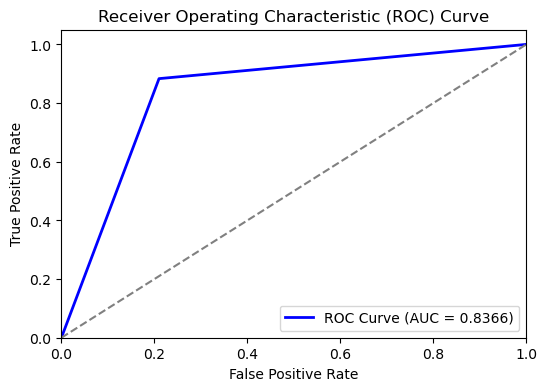

In [4]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_probs = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Logistic Regression Accuracy: 82.0500%
Confusion Matrix:
 [[ 510  214]
 [ 145 1131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       724
           1       0.84      0.89      0.86      1276

    accuracy                           0.82      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.82      0.82      0.82      2000



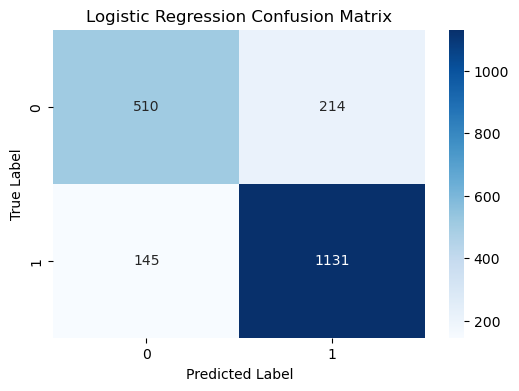

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr*100:.4f}%')

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

# Classification Report
cr_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", cr_lr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


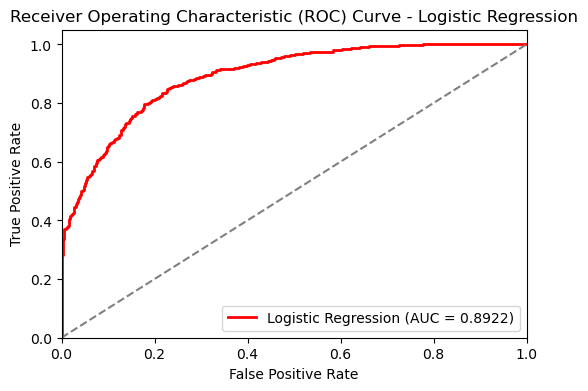

In [7]:
# Get prediction probabilities for Logistic Regression
y_probs_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()